# Classical PDE Solver Methods for Panel Buckling PDEs

Find the function w(x,y) and the eigenvalue $\lambda$ for transverse displacement of a plate such that on $\Omega = \{ (x,y) : 0 \leq x \leq a, \ 0 \leq y \leq b \}$ the PDE is satisfied. The constants $N_{xx}, N_{xy}, N_{yy}$ are prescribed by the user by loading type.
$$ D \nabla^4 w + \lambda ( N_{xx} \frac{\partial^2 w}{\partial x^2} + 2 N_{xy} \frac{\partial^2 w}{\partial x \partial y} + N_{yy} \frac{\partial^2 w}{\partial y^2} ) = 0 $$
And on the boundary $\partial \Omega$ we have simply supported BCs $w = 0$.

We will then use finite elements to solve this problem. First, we need to write the weak form with the test function $\delta w(x,y)$ in order to find a more suitable form for integration.
 
## Term 1 of the Weak Form
Term 1 of the weak form integral is:
$$ \int D \nabla^4 w \cdot \delta w dA = \int D (\frac{\partial^4 w}{\partial x^4} + 2 \frac{\partial^4 w}{\partial x^2 \partial y^2} + \frac{\partial^4 w}{\partial y^4} ) \cdot \delta w dA$$

The full expansion of this term is for each case:
$$ \int \frac{\partial^4 w}{\partial x^4} \cdot \delta w dx = (\frac{\partial^3 w}{\partial x^3} \delta w)|_{\partial \Omega} - (\frac{\partial^2 w}{\partial x^2} \frac{\partial \delta w}{\partial x})|_{\partial \Omega} + \int \frac{\partial^2 w}{\partial x^2} \frac{\partial^2 \delta w}{\partial x^2} dx $$
Since we have $w = 0$ on the boundary for simply supported and no moments on free edges for simply supported edges, the boundary terms are zero. WLOG, we can show that the full integral of term 1 of the weak form is:
$$ \int D \nabla^4 w \cdot \delta w dA = \int D \nabla^2 w \nabla^2 \delta w dA $$

## Term 2 of the Weak Form
The second term of the weak form involves user-prescribed constants $N_{ij}$ the in-plane loads and then we have:
$$ \int \left[ N_{xx} \frac{\partial^2 w}{\partial x^2} + 2 N_{xy} \frac{\partial^2 w}{\partial x \partial y} + N_{yy} \frac{\partial^2 w}{\partial y^2} \right] \delta w dA$$
By a similar argument, the boundary terms after integrating by parts are all zero as $\delta w = 0$ on the boundary. Then we have:
$$ - \int \left[ N_{xx} \frac{\partial w}{\partial x} \frac{\partial \delta w}{\partial x} + N_{xy} (\frac{\partial w}{\partial x} \frac{\partial \delta w}{\partial y} + \frac{\partial w}{\partial y} \frac{\partial \delta w}{\partial x}) + N_{yy} \frac{\partial w}{\partial y} \frac{\partial \delta w}{\partial y} \right] dA $$

## Finite Element Matrix
### Basis functions
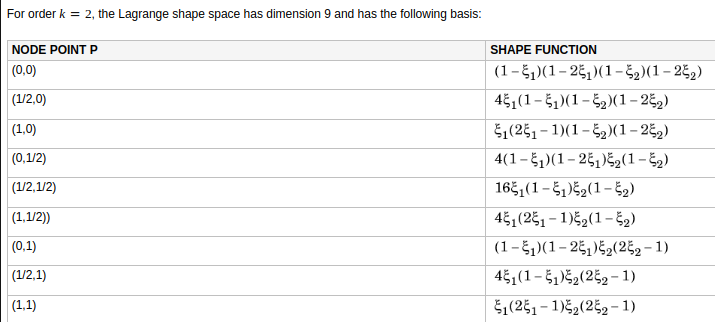

Then we need to compute the integrals on a single element:
$$ K_{ij} = \int D \nabla^2 \phi_i \nabla^2 \phi_j dA $$

And the stability matrix $G_{ij}$ below whose shear term is symmetric!
$$ G_{ij} = \int N_{xx} \partial_{x} \phi_i \partial_{x} \phi_j + N_{xy} \cdot (\partial_x \phi_i \partial_y \phi_j + \partial_y \phi_i \cdot \partial_x \phi_j) + N_{yy} \partial_{y} \phi_i \partial_{y} \phi_j dA $$

## Gaussian Quadrature
The integral of an arbitrary 2D function $f(x,y)$ over a quadrilateral can be approximated as:
$$ \int f(x,y) dx dy \approx \sum_{q \in Q} w_q f(x_q, y_q) $$
Where the Gauss quadrature rule for 4 quadrature points on a quadrilateral is:
$$ w_q = \{ 1, 1, 1, 1 \} $$
And the quadrature points are:
$$ (x_q, y_q) = (\pm 1/\sqrt{3}, \pm 1/\sqrt{3}) $$

## Compute Element Stiffness and Stability Matrices
Convert the derivatives to isoperimetric space or computational coordinate space $\xi = 2 (x - x_c) / \Delta x, \eta = 2( y - y_c) / \Delta y$ so that $\xi \in [-1, 1]$ on the element and $\eta \in [-1,1]$ on the element. The differentials conversion is then: $ dx = \Delta x / 2 \cdot d \xi$, $dy = \Delta y / 2 \cdot d \eta $.